In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

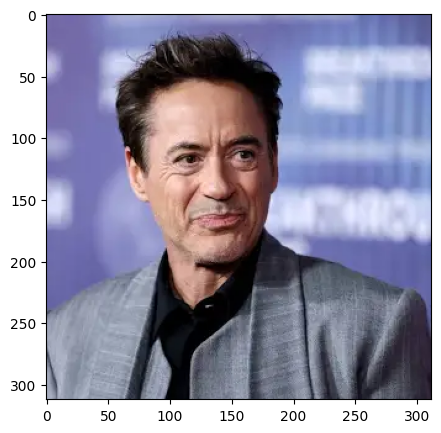

In [2]:
img=cv2.imread("../img/rdj.webp")
plt.figure(figsize=(14, 5))
# BGR to RGB [..., ::-1]
plt.imshow(img[..., ::-1])
plt.show()

In [6]:
import os
import urllib.request as urlreq
haarcascade_url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_alt2.xml"

haarcascade = "haarcascade_frontalface_alt2.xml"

if (haarcascade in os.listdir(os.curdir)):
    print("File exists")
else:
    urlreq.urlretrieve(haarcascade_url, haarcascade)
    print("File downloaded")

File downloaded


In [7]:
detector = cv2.CascadeClassifier(haarcascade)

In [8]:
imgGray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [9]:
faces = detector.detectMultiScale(imgGray)

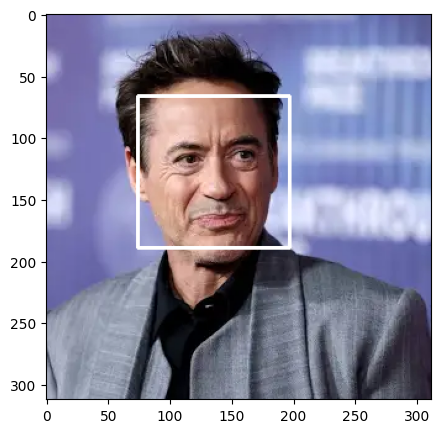

In [11]:
newImg=img.copy()
for face in faces:
    (x,y,w,d) = face
    cv2.rectangle(newImg,(x,y),(x+w, y+d),(255, 255, 255), 2)

plt.figure(figsize=(14, 5))
# BGR to RGB [..., ::-1]
plt.imshow(newImg[..., ::-1])
plt.show()

In [12]:
LBFmodel_url = "https://github.com/kurnianggoro/GSOC2017/raw/master/data/lbfmodel.yaml"
LBFmodel = "lbfmodel.yaml"

if (LBFmodel in os.listdir(os.curdir)):
    print("File exists")
else:
    urlreq.urlretrieve(LBFmodel_url, LBFmodel)
    print("File downloaded")

File downloaded


In [13]:
landmark_detector  = cv2.face.createFacemarkLBF()
landmark_detector.loadModel(LBFmodel)

In [15]:
_, landmarks = landmark_detector.fit(imgGray, faces)

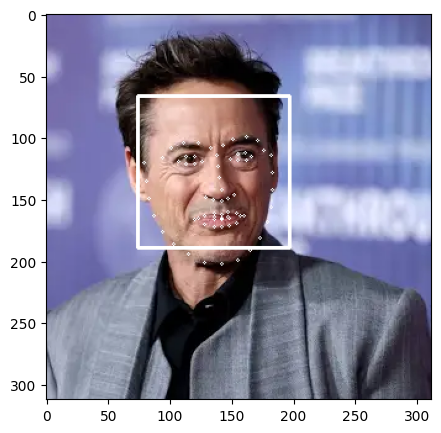

In [18]:
for landmark in landmarks:
    for x,y in landmark[0]:
        cv2.circle(newImg, (int(x), int(y)), 1, (255, 255, 255), 1)
plt.figure(figsize=(14, 5))
# BGR to RGB [..., ::-1]
plt.imshow(newImg[..., ::-1])
plt.show()

In [62]:
def createBox(img, points, scale=1):
    points = np.array(points, dtype=np.int32)

    mask = np.zeros_like(img)
    mask = cv2.fillPoly(mask, [points], (255, 255, 255))
    
    bbox = cv2.boundingRect(points)
    x, y, w, h = bbox
    
    imgCrop = img[y:y+h, x:x+w]
    imgCrop = cv2.resize(imgCrop, (0, 0), None, scale, scale)
    
    return mask, imgCrop

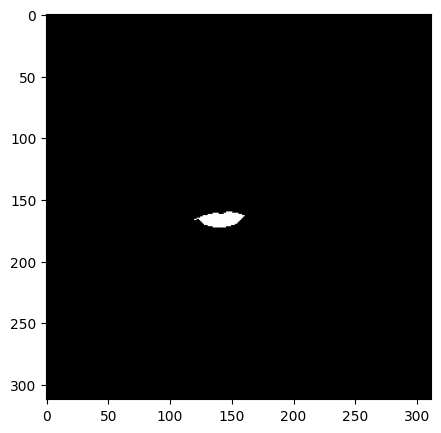

In [74]:
mask,imgLips=createBox(img,landmark[0][48:61],20)

plt.figure(figsize=(14, 5))
# BGR to RGB [..., ::-1]
plt.imshow(mask[..., ::-1])
plt.show()

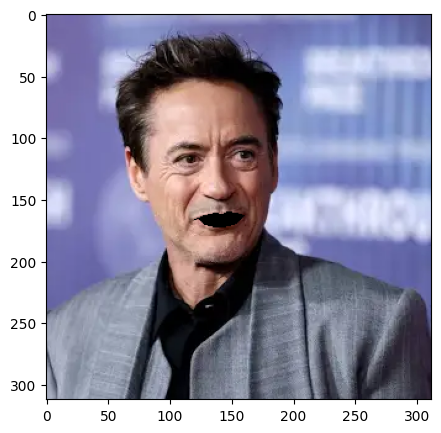

In [92]:
imgMaskWithoutLips=cv2.bitwise_and(~mask,img)

plt.figure(figsize=(14, 5))
# BGR to RGB [..., ::-1]
plt.imshow(imgMaskWithoutLips[..., ::-1])
plt.show()

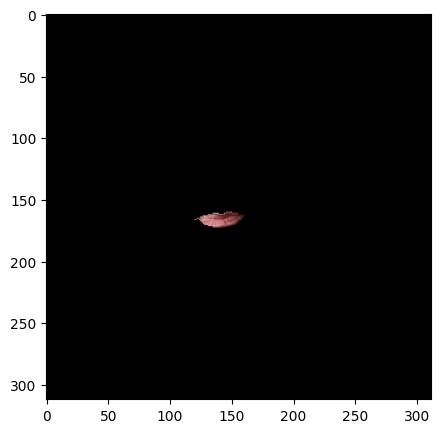

In [95]:
imgMaskWithLips=cv2.bitwise_and(mask,img)

plt.figure(figsize=(14, 5))
# BGR to RGB [..., ::-1]
plt.imshow(imgMaskWithLips[..., ::-1])
plt.show()

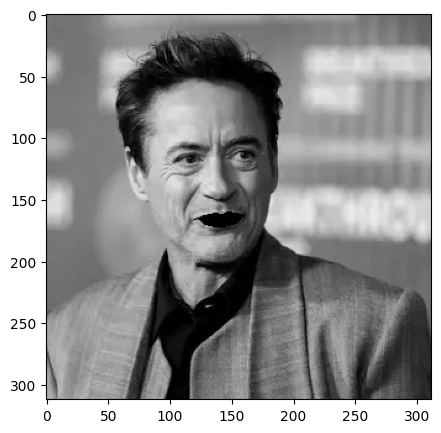

In [96]:
imgMaskWithoutLips=cv2.cvtColor(imgMaskWithoutLips, cv2.COLOR_BGR2GRAY)
imgMaskWithoutLips=cv2.cvtColor(imgMaskWithoutLips, cv2.COLOR_GRAY2BGR)

plt.figure(figsize=(14, 5))
# BGR to RGB [..., ::-1]
plt.imshow(imgMaskWithoutLips[..., ::-1])
plt.show()

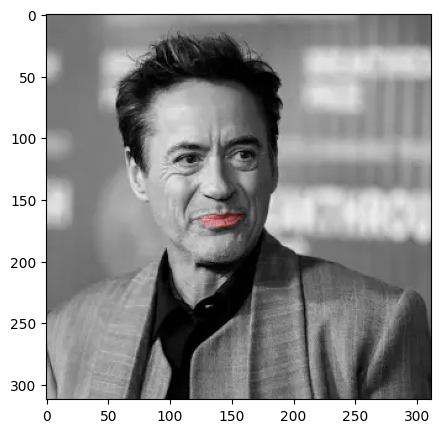

In [97]:
result=cv2.bitwise_or(imgMaskWithoutLips,imgMaskWithLips)

plt.figure(figsize=(14, 5))
# BGR to RGB [..., ::-1]
plt.imshow(result[..., ::-1])
plt.show()